<a href="https://colab.research.google.com/github/Cralsic123/Abalone-Rings-Predictor/blob/main/Abalone_Prediction_DL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [3]:
!pip install kaggle


In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [5]:
!kaggle competitions download -c playground-series-s4e4

playground-series-s4e4.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile
with zipfile.ZipFile('/content/playground-series-s4e4.zip', 'r') as zip_ref:
    zip_ref.extractall('./')



In [7]:
df = pd.read_csv("/content/train.csv")

In [8]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [9]:
df.drop("id", axis = 1, inplace=True)

In [10]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


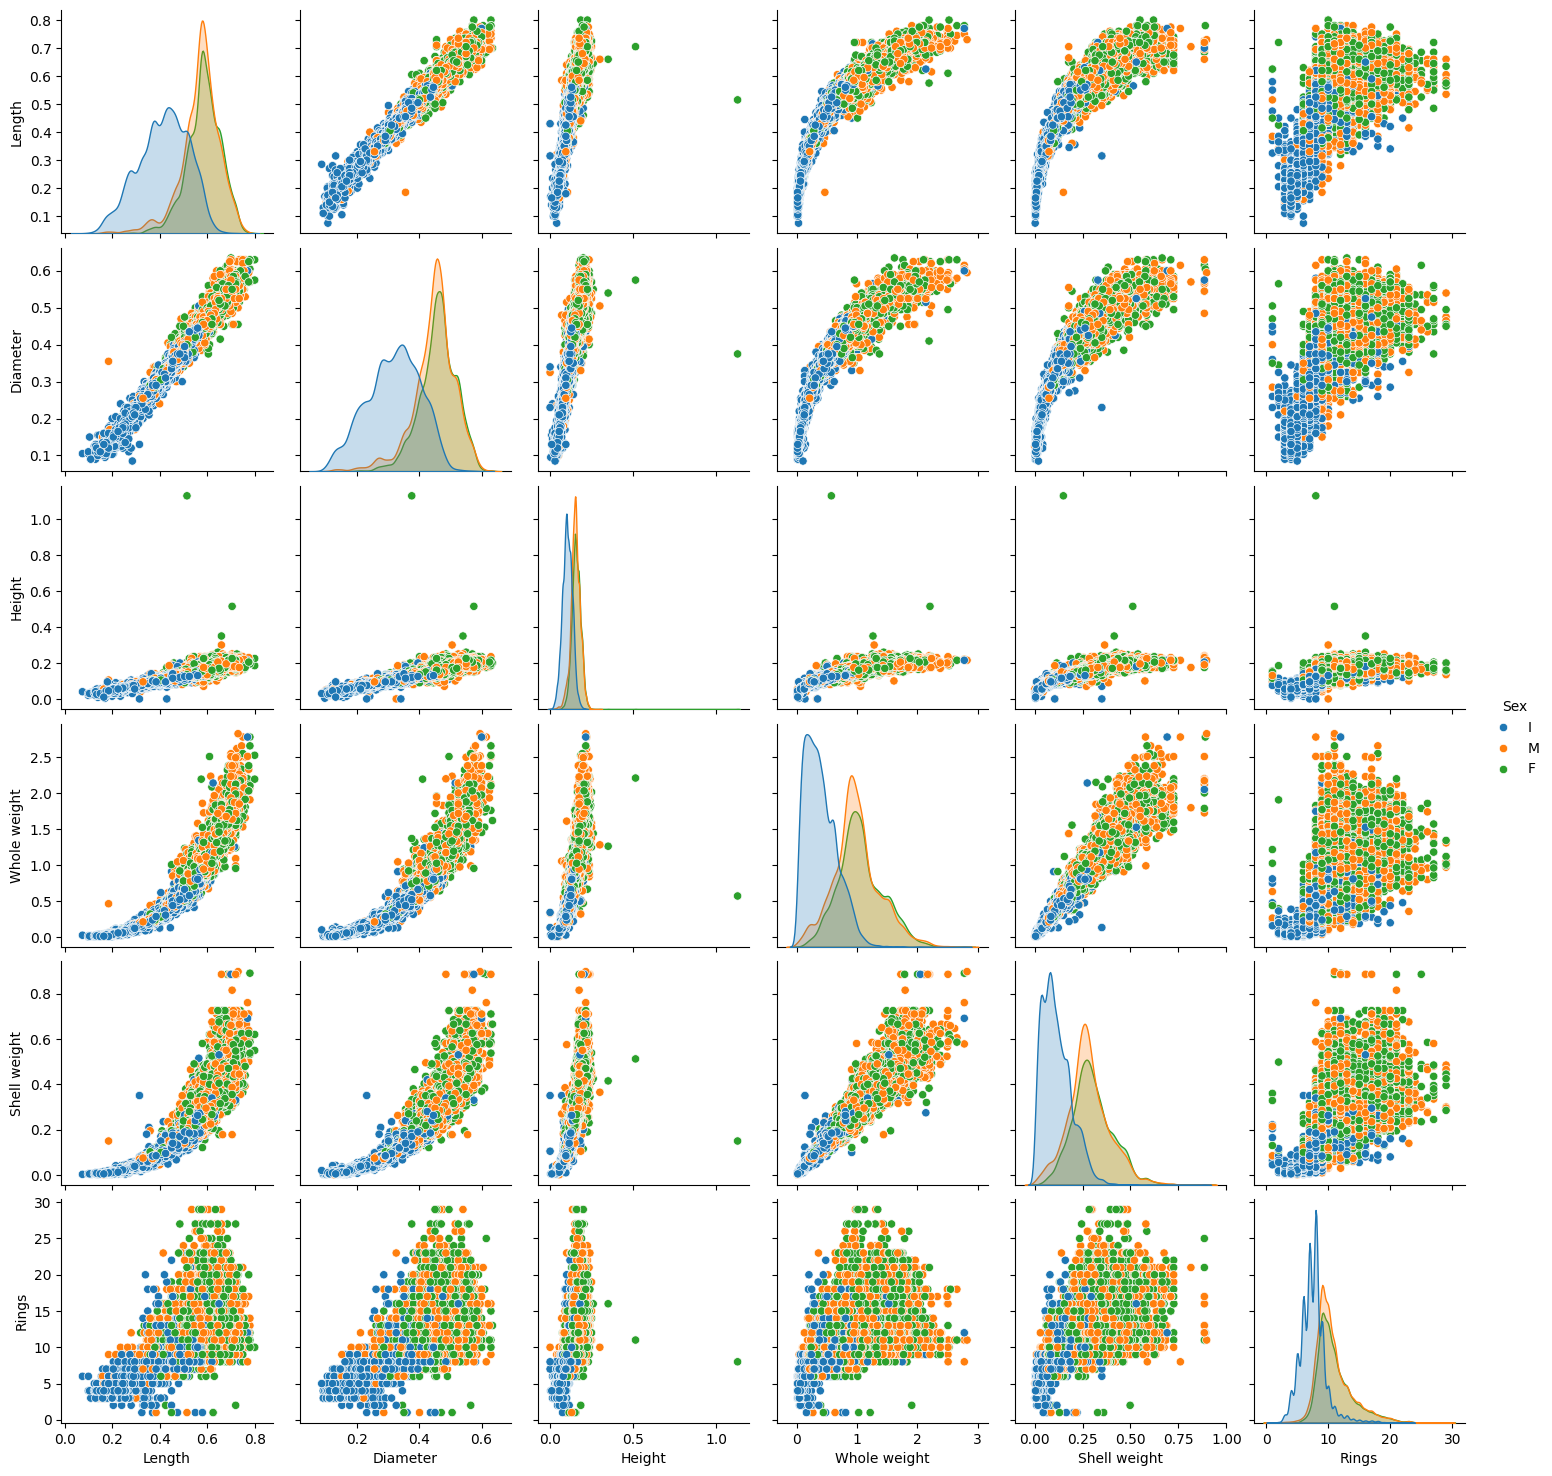

In [ ]:
data_subset = df.sample(n=int(len(df)/3), random_state=42)

# Create a pairplot from the training data
sns.pairplot(data_subset[['Length', 'Diameter', 'Height', 'Whole weight', 'Shell weight', 'Rings', 'Sex']], hue='Sex')
plt.show()

The categorical feature 'Sex' shows that infants (I) generally have the lowest numerical feature values.

Most features exhibit outliers.

I will be looking for the relation of rings and the catrgorical sex

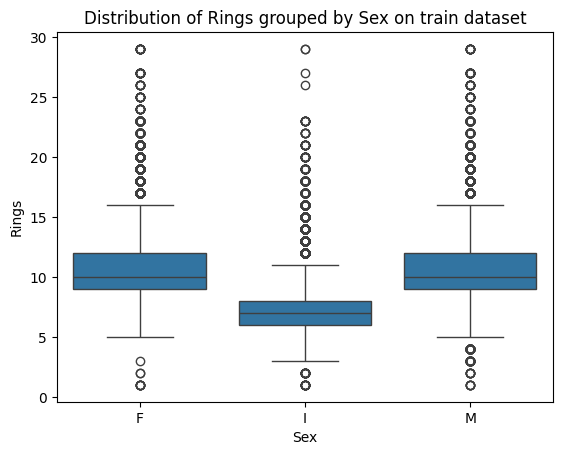

In [ ]:
sns.boxplot(x='Sex', y='Rings', data=df)
plt.title('Distribution of Rings grouped by Sex on train dataset')
plt.show()

For an infant the rings is lower

In [13]:
df1 = df

In [14]:
df['SEX']=np.where(df['Sex']=='I', 'Infant', 'Adult')


In [15]:
df.drop(['Sex'],axis =1,inplace=True)

In [16]:
df.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,SEX
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,Adult
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,Adult
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,Infant
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,Adult
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,Infant


In [17]:
target_label = "Rings"
column_of_interest = "Height"

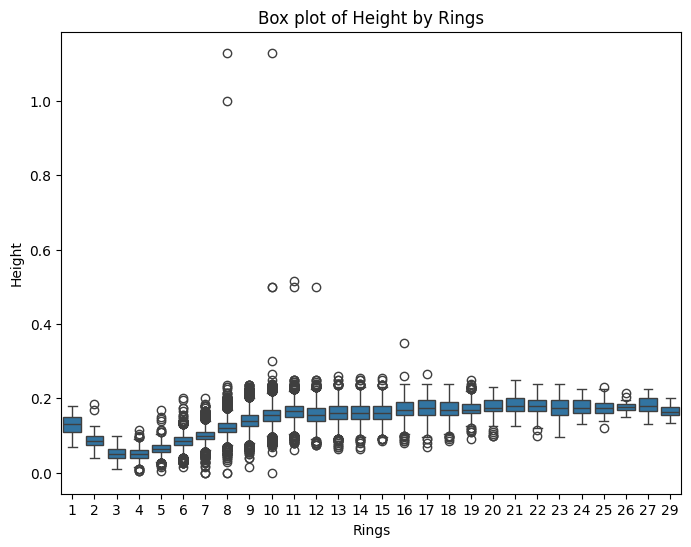

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[target_label], y=df[column_of_interest])
plt.title(f'Box plot of {column_of_interest} by {target_label}')
plt.xlabel(target_label)
plt.ylabel(column_of_interest)
plt.show()

Removing the outliers from the height column

In [19]:
from scipy.stats import zscore
column_with_outliers = 'Height'

z_scores = zscore(df[column_with_outliers])
threshold = 3
outlier_mask = (abs(z_scores) > threshold)

df = df[~outlier_mask]

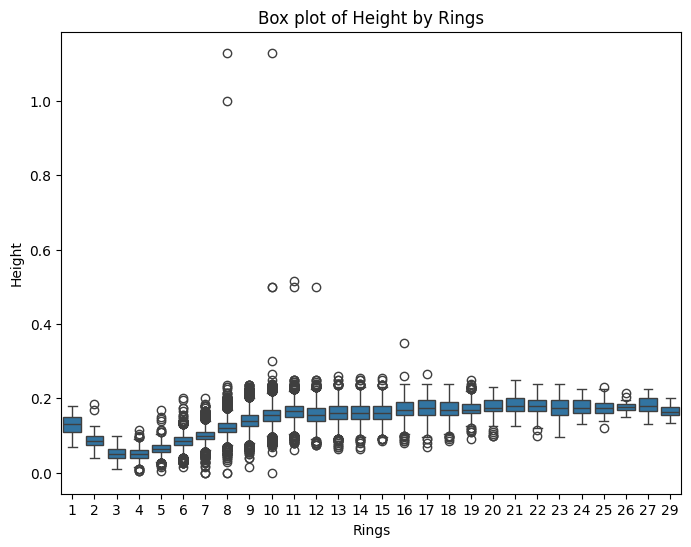

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df1[target_label], y=df1[column_of_interest])
plt.title(f'Box plot of {column_of_interest} by {target_label}')
plt.xlabel(target_label)
plt.ylabel(column_of_interest)
plt.show()

In [20]:
target_label = "Rings"
column_of_interest = "Diameter"

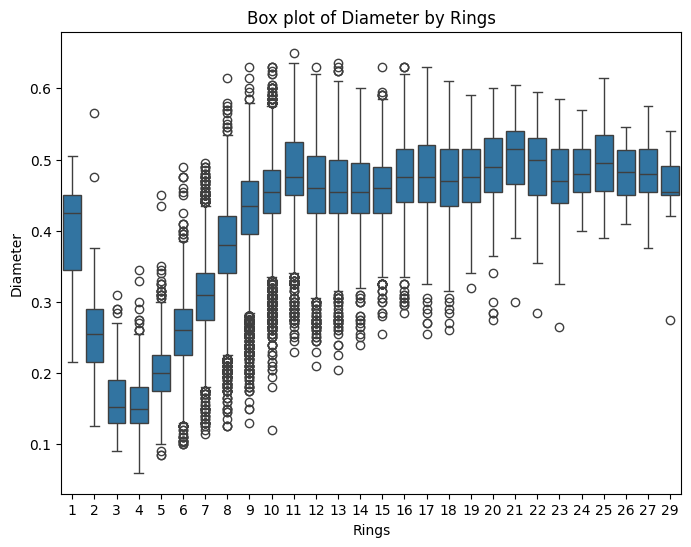

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[target_label], y=df[column_of_interest])
plt.title(f'Box plot of {column_of_interest} by {target_label}')
plt.xlabel(target_label)
plt.ylabel(column_of_interest)
plt.show()

Length	Diameter	Height	Whole weight	Whole weight.1	Whole weight.2	Shell weight

In [21]:
target_label = "Rings"
column_of_interest = "Whole weight"

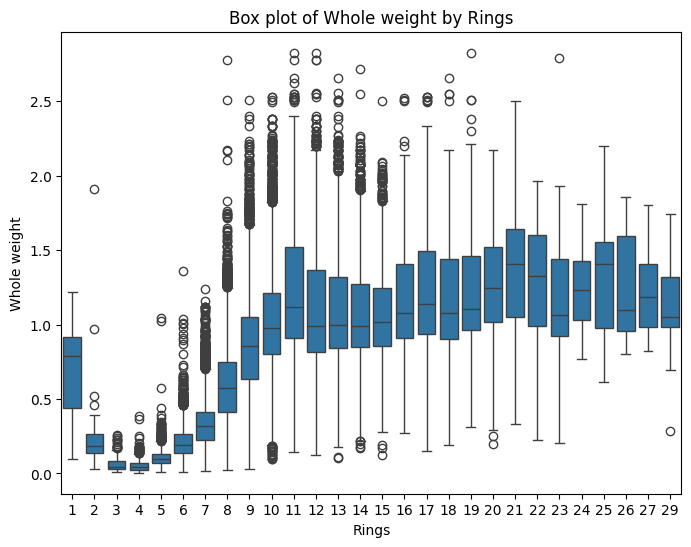

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[target_label], y=df[column_of_interest])
plt.title(f'Box plot of {column_of_interest} by {target_label}')
plt.xlabel(target_label)
plt.ylabel(column_of_interest)
plt.show()

In [23]:
from scipy.stats import zscore
column_with_outliers = 'Whole weight'

z_scores = zscore(df[column_with_outliers])
threshold = 3
outlier_mask = (abs(z_scores) > threshold)

df = df[~outlier_mask]

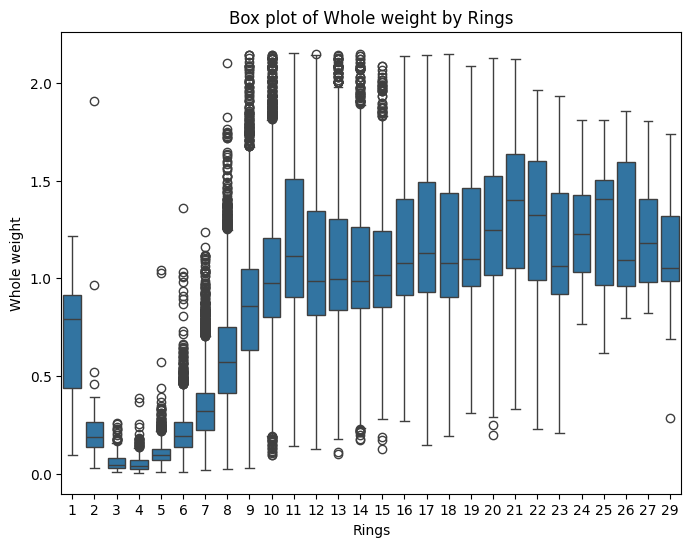

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[target_label], y=df[column_of_interest])
plt.title(f'Box plot of {column_of_interest} by {target_label}')
plt.xlabel(target_label)
plt.ylabel(column_of_interest)
plt.show()

In [25]:
df.isnull().sum().sum()

0

In [26]:
df['Volume'] = df['Height'] * df['Length'] * df['Diameter']

In [27]:
df.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,SEX,Volume
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,Adult,0.035475
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,Adult,0.044762
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,Infant,0.000440
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,Adult,0.042394
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,Infant,0.030664


In [28]:
df['Area'] = df['Height'] * df['Length']
df['Net Weight'] = df['Whole weight.1'] * df['Whole weight.2']

In [29]:
df['SEX'] = df['SEX'].replace({'Adult': 1, 'Infant': 0})

In [30]:
df.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,SEX,Volume,Area,Net Weight
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,1,0.035475,0.08250,0.048125
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,1,0.044762,0.09135,0.126637
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0,0.000440,0.00400,0.000016
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,1,0.042394,0.08925,0.077165
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0,0.030664,0.07215,0.059120


In [31]:
x = df.drop(columns = {'Rings'}, axis =1)
y = df['Rings']

In [32]:
x

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,SEX,Volume,Area,Net Weight
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,1,0.035475,0.082500,0.048125
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,1,0.044762,0.091350,0.126637
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,0,0.000440,0.004000,0.000016
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,1,0.042394,0.089250,0.077165
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,0,0.030664,0.072150,0.059120
...,...,...,...,...,...,...,...,...,...,...,...
90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,1,0.005904,0.025125,0.002534
90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,1,0.035381,0.083250,0.070150
90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,0,0.013637,0.041325,0.011853
90613,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,0,0.006986,0.025875,0.004802


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

In [34]:
print(x)

       Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0       0.550     0.430   0.150        0.7715          0.3285          0.1465   
1       0.630     0.490   0.145        1.1300          0.4580          0.2765   
2       0.160     0.110   0.025        0.0210          0.0055          0.0030   
3       0.595     0.475   0.150        0.9145          0.3755          0.2055   
4       0.555     0.425   0.130        0.7820          0.3695          0.1600   
...       ...       ...     ...           ...             ...             ...   
90610   0.335     0.235   0.075        0.1585          0.0685          0.0370   
90611   0.555     0.425   0.150        0.8790          0.3865          0.1815   
90612   0.435     0.330   0.095        0.3215          0.1510          0.0785   
90613   0.345     0.270   0.075        0.2000          0.0980          0.0490   
90614   0.425     0.325   0.100        0.3455          0.1525          0.0785   

       Shell weight  SEX   

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

x_train_std = scaler.fit_transform(x_train)

x_test_std = scaler.transform(x_test)

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_std.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
    ])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(x_train_std, y_train, epochs=50, batch_size=32, validation_split=0.2)


In [ ]:
mse = model.evaluate(x_test_std, y_test)
print("Mean Squared Error on Test Data:", mse)

564/564 [==============================] - 1s 1ms/step - loss: 3.5083 - accuracy: 2.2164e-04
Mean Squared Error on Test Data: [3.5083088874816895, 0.00022164348047226667]


In [37]:
test_data = pd.read_csv("test.csv")

In [38]:
test_data['SEX']=np.where(test_data['Sex']=='I', 'Infant', 'Adult')
test_data.drop(['Sex'],axis =1,inplace=True)


In [39]:
test_data['SEX'] = test_data['SEX'].replace({'Adult': 1, 'Infant': 0})

In [40]:
test_data['Volume'] = test_data['Height'] * test_data['Length'] * test_data['Diameter']

In [41]:
test_data['Area'] = test_data['Height'] * test_data['Length']
test_data['Net Weight'] = test_data['Whole weight.1'] * test_data['Whole weight.2']

In [42]:
test_data.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,SEX,Volume,Area,Net Weight
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,1,0.047488,0.099975,0.193281
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,1,0.042688,0.092800,0.105031
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,1,0.032928,0.078400,0.065036
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,1,0.040498,0.082650,0.065741
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,0,0.014836,0.045650,0.010553


In [43]:
test_data_modified = test_data.drop(columns = {'id'}, axis =1)

In [44]:
test_data_modified.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,SEX,Volume,Area,Net Weight
0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,1,0.047488,0.099975,0.193281
1,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,1,0.042688,0.092800,0.105031
2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,1,0.032928,0.078400,0.065036
3,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,1,0.040498,0.082650,0.065741
4,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,0,0.014836,0.045650,0.010553


In [45]:
test_data_std = scaler.transform(test_data_modified)


In [ ]:
test_data_std = scaler.transform(test_data_modified)
predictions_DL = model.predict(test_data_std)
predictions_DL = predictions_DL.round().astype(int)
predictions_DL[predictions_DL == -2] = 4
predictions_DL[predictions_DL == 0] = 4
predictions_DL[predictions_DL == 1] = 4

1888/1888 [==============================] - 3s 1ms/step


In [ ]:
results_df_DL = pd.DataFrame({'id': test_data['id'], 'Rings': predictions_DL.flatten()})
results_df_DL.to_csv("predictions_LSTM.csv", index=False)

In [ ]:
results_df_DL['Rings'].value_counts()

Rings
10    11923
9      8373
11     8239
8      6831
7      6035
12     5107
13     3071
6      2638
14     2011
5      1728
15     1559
16     1005
4       743
17      641
18      332
19      132
20       35
21        3
29        1
23        1
3         1
28        1
25        1
Name: count, dtype: int64

In [ ]:
results_df_DL['Rings'].value_counts()

Rings
10    11851
9      9158
11     7874
8      7262
7      6772
12     4196
6      2948
13     2866
14     2312
5      1999
15     1481
4       755
16      648
17      223
18       46
19        8
3         5
42        2
24        1
27        1
20        1
21        1
26        1
Name: count, dtype: int64

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='logistic', solver='sgd', alpha=0.0001, random_state=42)


mlp_regressor.fit(x_train_std, y_train)


y_pred = mlp_regressor.predict(x_test_std)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 3.6452249280004505


In [ ]:
predictions_DL = model.predict(test_data_std)
predictions_DL = predictions_DL.round().astype(int)
predictions_DL[predictions_DL == -2] = 4
predictions_DL[predictions_DL == 0] = 4
predictions_DL[predictions_DL == 1] = 4

1888/1888 [==============================] - 2s 1ms/step


In [ ]:
results_df_DL = pd.DataFrame({'id': test_data['id'], 'Rings': predictions_DL.flatten()})
results_df_DL.to_csv("predictions_LSTM_1.csv", index=False)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_std.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
    ])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [50]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, Huber, LogCosh, Poisson


In [ ]:
optimizer_rmsprop = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer_rmsprop, loss='mean_squared_error', metrics=['accuracy'])


In [ ]:
model.fit(x_train_std, y_train, epochs=70, batch_size=32, validation_split=0.2)


In [ ]:
mse = model.evaluate(x_test_std, y_test)
print("Mean Squared Error on Test Data:", mse)

564/564 [==============================] - 1s 1ms/step - loss: 3.4359 - accuracy: 2.2164e-04
Mean Squared Error on Test Data: [3.435904026031494, 0.00022164348047226667]


In [61]:
predictions_DL = model.predict(test_data_std)
predictions_DL = predictions_DL.round().astype(int)
predictions_DL[predictions_DL == -2] = 4
predictions_DL[predictions_DL == -1] = 4
predictions_DL[predictions_DL == 0] = 4
predictions_DL[predictions_DL == -9] = 4
predictions_DL[predictions_DL == -16] = 4
predictions_DL[predictions_DL == -17] = 4
predictions_DL[predictions_DL == 1] = 4

NameError: name 'model' is not defined

In [ ]:
predictions_DL[predictions_DL == -11] = 11

In [ ]:
results_df_DL = pd.DataFrame({'id': test_data['id'], 'Rings': predictions_DL.flatten()})
results_df_DL.to_csv("predictions_LSTM_1.csv", index=False)

In [ ]:
results_df_DL['Rings'].value_counts()

Rings
10    12186
9      9994
8      8148
11     7172
7      6487
12     3894
6      2485
13     2398
14     1880
5      1836
15     1536
16      979
4       573
17      466
18      249
19      106
20       21
21        1
Name: count, dtype: int64

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [67]:
rf_regressor.fit(x_train_std, y_train)

RandomForestRegressor(random_state=42)

In [68]:
y_pred = rf_regressor.predict(x_test_std)

In [69]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.475286507091052


In [70]:
predictions_DL = rf_regressor.predict(test_data_std)
predictions_DL = predictions_DL.round().astype(int)
predictions_DL[predictions_DL == -2] = 4
predictions_DL[predictions_DL == 0] = 4
predictions_DL[predictions_DL == 1] = 4
results_df_DL = pd.DataFrame({'id': test_data['id'], 'Rings': predictions_DL.flatten()})
results_df_DL.to_csv("predictions.csv", index=False)

In [71]:
results_df_DL = pd.DataFrame({'id': test_data['id'], 'Rings': predictions_DL.flatten()})
results_df_DL.to_csv("predictions.csv", index=False)

In [46]:
from sklearn.svm import SVR

In [47]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [48]:
svr_rbf.fit(x_train_std, y_train)

SVR(C=100, gamma=0.1)

In [ ]:
svr_lin.fit(x_train_std, y_train)
svr_poly.fit(x_train_std, y_train)

In [49]:
y_pred = svr_rbf.predict(x_test_std)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

NameError: name 'mean_squared_error' is not defined

In [52]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.7522437947876877


In [53]:
predictions_DL = svr_rbf.predict(test_data_std)
predictions_DL = predictions_DL.round().astype(int)
predictions_DL[predictions_DL == -2] = 4
predictions_DL[predictions_DL == 0] = 4
predictions_DL[predictions_DL == 1] = 4
results_df_DL = pd.DataFrame({'id': test_data['id'], 'Rings': predictions_DL.flatten()})
results_df_DL.to_csv("predictions_123.csv", index=False)